In [87]:
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow
py.init_notebook_mode(connected=True)


## Keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

## Reading the Data

In [88]:
pip install tensorflow


[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data Directory
# Please edit according to your directory change.
dir_list = os.listdir("C:\\Users\\mouni\\OneDrive\\Desktop\\audio\\Audio_Speech_Actors_01-24")
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [3]:
# Create DataFrame for Data intel
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('C:\\Users\\mouni\\OneDrive\\Desktop\\audio\\Audio_Speech_Actors_01-24\\' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = 'C:\\Users\\mouni\\OneDrive\\Desktop\\audio\\Audio_Speech_Actors_01-24\\' + i + '\\' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if (actor)%2 == 0:
            gender = "male"
        else:
            gender = "female"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [4]:
print (len(data_df))
data_df.head(25)

1440


,path,source,actor,gender,intensity,statement,repetition,emotion
0,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,0,1
1,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,1,1
2,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,0,1
3,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,1,1
4,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,0,2
5,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,1,2
6,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,0,2
7,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,1,2
8,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,1,0,0,2
9,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,1,0,1,2


## Plotting the audio file's waveform and its spectrogram

In [5]:
filename = data_df.path[1021]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

C:\Users\mouni\OneDrive\Desktop\audio\Audio_Speech_Actors_01-24\Actor_18\03-01-01-01-01-02-18.wav


(22050, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

In [6]:
len(samples), sample_rate

(77989, 22050)

In [7]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [8]:
sample_rate/ len(samples)

0.28273218017925605

Text(0.5, 0, 'Seconds')

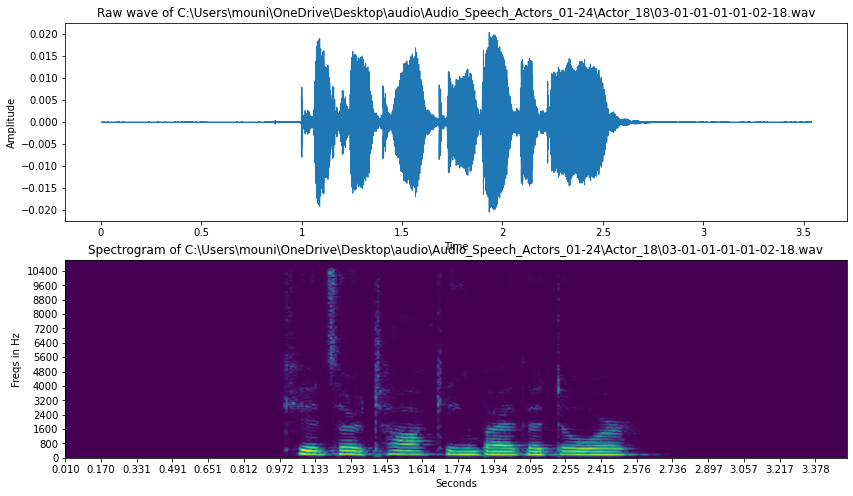

In [9]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveshow(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [10]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [11]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([-1.9141038e-07, -4.1607140e-07,  2.0688096e-06, ...,
         5.6699279e-05,  2.1195672e-05,  3.1794041e-06], dtype=float32),
 array([20992, 58880]))

C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\2791869321.py:2: FutureWarning:

Pass y=[-1.9141038e-07 -4.1607140e-07  2.0688096e-06 ...  5.6699279e-05
  2.1195672e-05  3.1794041e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error



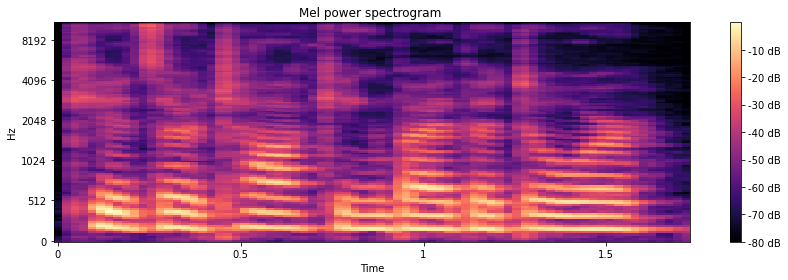

In [12]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

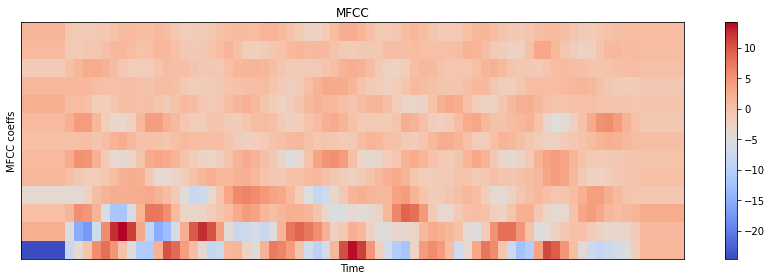

In [13]:
# +
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [14]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

In [15]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

In [16]:
# Silence trimmed Sound by manual trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

## Defining the label

In [17]:
# 2 class: Positive & Negative

# Positive: Calm, Happy
# Negative: Angry, Fearful, Sad

label2_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2: # Calm
        lb = "_Unstressed"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_Untressed"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_Stressed"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_Stressed"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_Stressed"
    else:
        lb = "_none"
        
    # Add gender to the label    
    label2_list.append(data_df.gender[i] + lb)
    
len(label2_list)

1440

In [18]:
#3 class: Positive, Neutral & Negative

# Positive:  Happy
# Negative: Angry, Fearful, Sad
# Neutral: Calm, Neutral

label3_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1: # Neutral
        lb = "_neutral"
    elif data_df.emotion[i] == 2: # Calm
        lb = "_neutral"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_Unstressed"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_Stressed"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_Stressed"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_Stressed"
    else:
        lb = "_none"
    
    # Add gender to the label  
    label3_list.append(data_df.gender[i] + lb)
    
len(label3_list)

1440

In [19]:
# 5 class: angry, calm, sad, happy & fearful
label5_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2:
        lb = "_neutral"
    elif data_df.emotion[i] == 3:
        lb = "_Unstressed"
    elif data_df.emotion[i] == 4:
        lb = "_Stressed"
    elif data_df.emotion[i] == 5:
        lb = "_Stressed"
    elif data_df.emotion[i] == 6:
        lb = "_Stressed"    
    else:
        lb = "_none"
    
    # Add gender to the label  
    label5_list.append(data_df.gender[i] + lb)
    
len(label5_list)

1440

In [20]:
# All class

label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_neutral"
    elif data_df.emotion[i] == 3:
        lb = "_Untressed"
    elif data_df.emotion[i] == 4:
        lb = "_Stressed"
    elif data_df.emotion[i] == 5:
        lb = "_Stressed"
    elif data_df.emotion[i] == 6:
        lb = "_Stressed"
    elif data_df.emotion[i] == 7:
        lb = "_Stressed"
    elif data_df.emotion[i] == 8:
        lb = "_Unstressed"
    else:
        lb = "_none"
        
    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    
len(label8_list)

1440

In [21]:
# Select the label set you want by commenting the unwanteds.

data_df['label'] = label5_list
#data_df['label'] = label3_list
#data_df['label'] = label5_list
#data_df['label'] = label8_list
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,0,1,female_none
1,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,1,1,female_none
2,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,0,1,female_none
3,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,1,1,female_none
4,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,0,2,female_neutral


In [22]:
print (data_df.label.value_counts().keys())

Index(['female_Stressed', 'male_Stressed', 'female_none', 'male_none',
       'female_neutral', 'female_Unstressed', 'male_neutral',
       'male_Unstressed'],
      dtype='object')


In [23]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

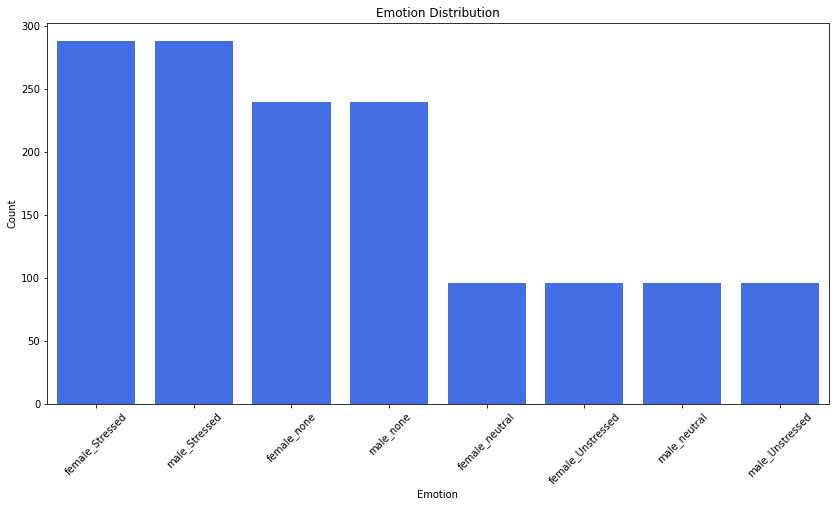

In [24]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

## Data Splitting

In [25]:
# FeMale Data Set

data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
#data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_happy"]
data2_df = data2_df[data2_df.label != "female_angry"]
data2_df = data2_df[data2_df.label != "female_sad"]
data2_df = data2_df[data2_df.label != "female_fearful"]
data2_df = data2_df[data2_df.label != "female_calm"]
data2_df = data2_df[data2_df.label != "female_positive"]
data2_df = data2_df[data2_df.label != "female_negative"].reset_index(drop=True)

tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head(50)

920


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,0,1,female_none
1,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,1,1,female_none
2,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,0,1,female_none
3,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,1,1,female_none
4,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,0,3,female_Unstressed
5,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,0,1,3,female_Unstressed
6,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,0,3,female_Unstressed
7,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,0,1,1,3,female_Unstressed
8,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,1,0,0,3,female_Unstressed
9,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,1,female,1,0,1,3,female_Unstressed


In [26]:
print (len(data3_df))
data3_df.head(80)

104


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,21,female,0,0,0,1,female_none
1,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,21,female,0,0,1,1,female_none
2,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,21,female,0,1,0,1,female_none
3,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,21,female,0,1,1,1,female_none
4,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,21,female,0,0,0,3,female_Unstressed
...,...,...,...,...,...,...,...,...,...
75,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,23,female,0,1,1,5,female_Stressed
76,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,23,female,1,0,0,5,female_Stressed
77,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,23,female,1,0,1,5,female_Stressed
78,C:\Users\mouni\OneDrive\Desktop\audio\Audio_Sp...,1,23,female,1,1,0,5,female_Stressed


## Analysing Features of audio files using librosa

In [27]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 920/920 [01:39<00:00,  9.22it/s]


In [28]:
data.head()

,feature
0,"[-65.80097, -65.80097, -65.80097, -65.80097, -..."
1,"[-63.190464, -62.799866, -63.830635, -60.55258..."
2,"[-65.81886, -65.81886, -65.81886, -65.81886, -..."
3,"[-66.05848, -66.05848, -66.05848, -66.05848, -..."
4,"[-63.78695, -63.12836, -63.412422, -63.796757,..."


In [29]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [30]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-63.190464,-62.799866,-63.830635,-60.552586,-60.821678,-62.073399,-64.889229,-65.389946,-65.389946,-65.389946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629539,-64.802628,-65.818863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-63.786949,-63.128361,-63.412422,-63.796757,-63.581989,-58.921223,-57.955044,-61.224972,-63.782932,-63.796757,...,-63.714218,-63.740608,-62.410255,-62.489079,-62.494453,-62.632626,-62.87817,NaN,NaN,NaN


In [31]:
newdf = pd.concat([df3,labels], axis=1)

In [32]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

920

In [33]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_none
1,-63.190464,-62.799866,-63.830635,-60.552586,-60.821678,-62.073399,-64.889229,-65.389946,-65.389946,-65.389946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_none
2,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629539,-64.802628,-65.818863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_none
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_none
4,-63.786949,-63.128361,-63.412422,-63.796757,-63.581989,-58.921223,-57.955044,-61.224972,-63.782932,-63.796757,...,-63.740608,-62.410255,-62.489079,-62.494453,-62.632626,-62.878170,NaN,NaN,NaN,female_Unstressed
5,-60.981255,-60.116066,-60.978924,-60.952457,-60.982483,-60.983948,-60.981255,-60.981255,-60.981255,-60.249615,...,-60.981255,-60.981255,-60.981255,-60.981255,-60.981255,-60.981255,NaN,NaN,NaN,female_Unstressed
6,-65.427315,-65.427315,-65.261780,-65.427315,-65.427315,-65.427315,-65.027588,-65.404327,-65.427315,-58.999031,...,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,female_Unstressed
7,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.057152,-64.404816,female_Unstressed
8,-59.691563,-58.715481,-58.048584,-57.370796,-58.199924,-59.706638,-59.876179,-59.998066,-59.936649,-60.248569,...,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,female_Unstressed
9,-56.756023,-56.761162,-56.415257,-55.715679,-55.817852,-55.832748,-55.889751,-55.116520,-54.244675,-56.211891,...,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,female_Unstressed


In [34]:
rnewdf.isnull().sum().sum()

4133

In [35]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,female_none
1,-63.190464,-62.799866,-63.830635,-60.552586,-60.821678,-62.073399,-64.889229,-65.389946,-65.389946,-65.389946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,female_none
2,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629539,-64.802628,-65.818863,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,female_none
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,female_none
4,-63.786949,-63.128361,-63.412422,-63.796757,-63.581989,-58.921223,-57.955044,-61.224972,-63.782932,-63.796757,...,-63.740608,-62.410255,-62.489079,-62.494453,-62.632626,-62.87817,0.0,0.0,0.0,female_Unstressed


## Data Making/Processing

In [36]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

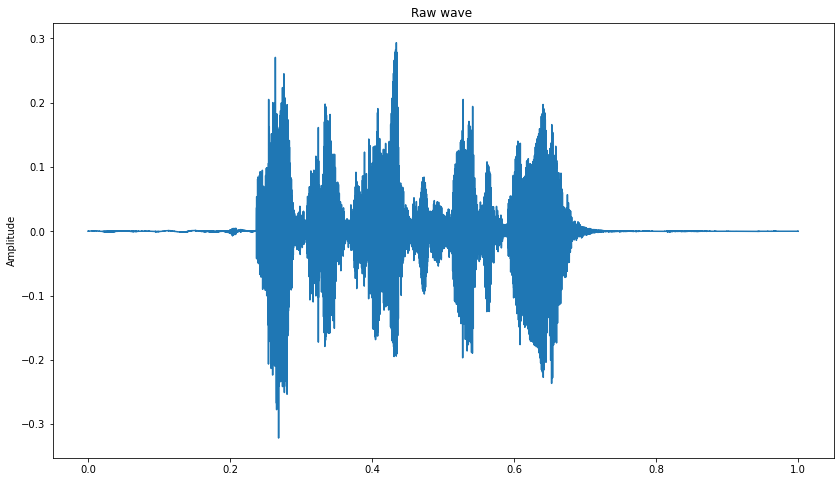

In [37]:
X, sample_rate = librosa.load(data2_df.path[216], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.3)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error



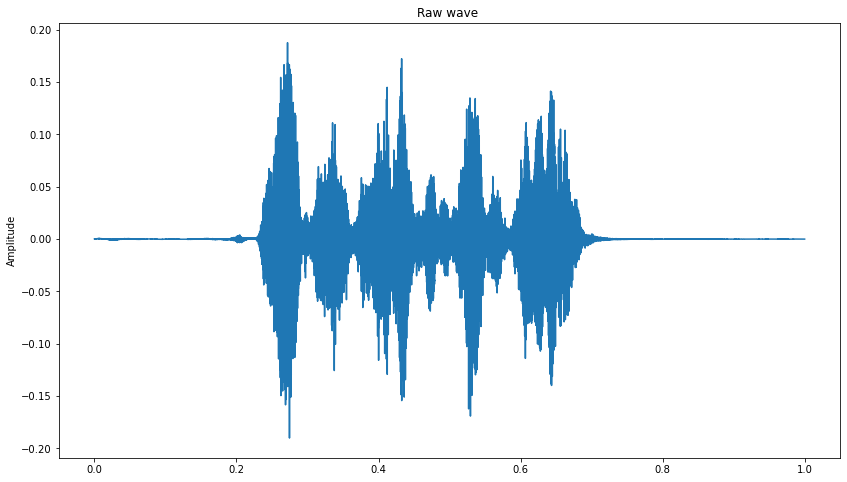

In [38]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [39]:
# Data Making Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 920/920 [01:04<00:00, 14.26it/s]


In [40]:
# Data Making Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=44100,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=44100, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data2_df.label[i]]

  0%|                                                                                                                                                                                     | 0/920 [00:00<?, ?it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  0%|▍                                                                                                                                                                            | 2/920 [00:00<04:40,  3.27it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  0%|▌                                                                                                                                                                            | 3/920 [00:

  2%|███▉                                                                                                                                                                        | 21/920 [00:07<05:36,  2.67it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  2%|████                                                                                                                                                                        | 22/920 [00:07<05:01,  2.97it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  2%|████▎                                                                                                                                                                       | 23/920 [00:

  4%|███████▋                                                                                                                                                                    | 41/920 [00:14<04:17,  3.42it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  5%|███████▊                                                                                                                                                                    | 42/920 [00:14<04:58,  2.94it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  5%|████████                                                                                                                                                                    | 43/920 [00:

  7%|███████████▍                                                                                                                                                                | 61/920 [00:22<05:26,  2.63it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  7%|███████████▌                                                                                                                                                                | 62/920 [00:22<05:01,  2.85it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  7%|███████████▊                                                                                                                                                                | 63/920 [00:

  9%|███████████████▏                                                                                                                                                            | 81/920 [00:29<04:27,  3.13it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  9%|███████████████▎                                                                                                                                                            | 82/920 [00:30<05:28,  2.55it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

  9%|███████████████▌                                                                                                                                                            | 83/920 [00:

 11%|██████████████████▊                                                                                                                                                        | 101/920 [00:37<05:06,  2.67it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 11%|██████████████████▉                                                                                                                                                        | 102/920 [00:37<04:37,  2.94it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 11%|███████████████████▏                                                                                                                                                       | 103/920 [00:

 13%|██████████████████████▍                                                                                                                                                    | 121/920 [00:44<03:43,  3.58it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 13%|██████████████████████▋                                                                                                                                                    | 122/920 [00:44<04:35,  2.89it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 13%|██████████████████████▊                                                                                                                                                    | 123/920 [00:

 15%|██████████████████████████▏                                                                                                                                                | 141/920 [00:52<05:35,  2.32it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 15%|██████████████████████████▍                                                                                                                                                | 142/920 [00:52<05:03,  2.56it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 16%|██████████████████████████▌                                                                                                                                                | 143/920 [00:

 18%|█████████████████████████████▉                                                                                                                                             | 161/920 [00:59<04:24,  2.87it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 18%|██████████████████████████████                                                                                                                                             | 162/920 [00:59<04:02,  3.12it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 18%|██████████████████████████████▎                                                                                                                                            | 163/920 [01:

 20%|█████████████████████████████████▋                                                                                                                                         | 181/920 [01:06<05:28,  2.25it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 20%|█████████████████████████████████▊                                                                                                                                         | 182/920 [01:07<04:52,  2.52it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 20%|██████████████████████████████████                                                                                                                                         | 183/920 [01:

 22%|█████████████████████████████████████▎                                                                                                                                     | 201/920 [01:13<04:00,  2.99it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 22%|█████████████████████████████████████▌                                                                                                                                     | 202/920 [01:13<03:36,  3.31it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 22%|█████████████████████████████████████▋                                                                                                                                     | 203/920 [01:

 24%|█████████████████████████████████████████                                                                                                                                  | 221/920 [01:19<03:22,  3.46it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 24%|█████████████████████████████████████████▎                                                                                                                                 | 222/920 [01:20<03:06,  3.75it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 24%|█████████████████████████████████████████▍                                                                                                                                 | 223/920 [01:

 26%|████████████████████████████████████████████▊                                                                                                                              | 241/920 [01:26<03:27,  3.27it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 26%|████████████████████████████████████████████▉                                                                                                                              | 242/920 [01:27<04:23,  2.57it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 26%|█████████████████████████████████████████████▏                                                                                                                             | 243/920 [01:

 28%|████████████████████████████████████████████████▌                                                                                                                          | 261/920 [01:34<04:03,  2.71it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 28%|████████████████████████████████████████████████▋                                                                                                                          | 262/920 [01:34<03:45,  2.92it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 29%|████████████████████████████████████████████████▉                                                                                                                          | 263/920 [01:

 31%|████████████████████████████████████████████████████▏                                                                                                                      | 281/920 [01:41<03:17,  3.24it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 31%|████████████████████████████████████████████████████▍                                                                                                                      | 282/920 [01:41<03:07,  3.40it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 31%|████████████████████████████████████████████████████▌                                                                                                                      | 283/920 [01:

 33%|███████████████████████████████████████████████████████▉                                                                                                                   | 301/920 [01:48<04:54,  2.10it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 33%|████████████████████████████████████████████████████████▏                                                                                                                  | 302/920 [01:49<04:23,  2.35it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 33%|████████████████████████████████████████████████████████▎                                                                                                                  | 303/920 [01:

 35%|███████████████████████████████████████████████████████████▋                                                                                                               | 321/920 [01:56<03:28,  2.88it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 35%|███████████████████████████████████████████████████████████▊                                                                                                               | 322/920 [01:56<03:11,  3.12it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 35%|████████████████████████████████████████████████████████████                                                                                                               | 323/920 [01:

 37%|███████████████████████████████████████████████████████████████▍                                                                                                           | 341/920 [02:03<04:07,  2.34it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 37%|███████████████████████████████████████████████████████████████▌                                                                                                           | 342/920 [02:04<03:57,  2.43it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 37%|███████████████████████████████████████████████████████████████▊                                                                                                           | 343/920 [02:

 39%|███████████████████████████████████████████████████████████████████                                                                                                        | 361/920 [02:10<03:17,  2.83it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 39%|███████████████████████████████████████████████████████████████████▎                                                                                                       | 362/920 [02:10<03:01,  3.07it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 39%|███████████████████████████████████████████████████████████████████▍                                                                                                       | 363/920 [02:

 41%|██████████████████████████████████████████████████████████████████████▊                                                                                                    | 381/920 [02:16<02:36,  3.44it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 42%|███████████████████████████████████████████████████████████████████████                                                                                                    | 382/920 [02:17<02:31,  3.55it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 42%|███████████████████████████████████████████████████████████████████████▏                                                                                                   | 383/920 [02:

 44%|██████████████████████████████████████████████████████████████████████████▌                                                                                                | 401/920 [02:23<02:53,  2.99it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 44%|██████████████████████████████████████████████████████████████████████████▋                                                                                                | 402/920 [02:24<03:24,  2.53it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 44%|██████████████████████████████████████████████████████████████████████████▉                                                                                                | 403/920 [02:

 46%|██████████████████████████████████████████████████████████████████████████████▎                                                                                            | 421/920 [02:31<03:19,  2.50it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 46%|██████████████████████████████████████████████████████████████████████████████▍                                                                                            | 422/920 [02:31<02:52,  2.89it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 46%|██████████████████████████████████████████████████████████████████████████████▌                                                                                            | 423/920 [02:

 48%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 441/920 [02:37<02:21,  3.38it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 48%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 442/920 [02:38<02:27,  3.23it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 48%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 443/920 [02:

 50%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 461/920 [02:44<02:04,  3.68it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 462/920 [02:44<02:14,  3.41it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 50%|██████████████████████████████████████████████████████████████████████████████████████                                                                                     | 463/920 [02:

 52%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 481/920 [02:50<02:30,  2.92it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 52%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 482/920 [02:51<02:53,  2.52it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 52%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 483/920 [02:

 54%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 501/920 [02:57<02:59,  2.33it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 55%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 502/920 [02:58<02:48,  2.48it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 55%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 503/920 [02:

 57%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 521/920 [03:04<02:11,  3.03it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 522/920 [03:04<02:04,  3.19it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 523/920 [03:

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 541/920 [03:11<01:50,  3.44it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 542/920 [03:11<02:05,  3.00it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 543/920 [03:

 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 561/920 [03:18<02:19,  2.57it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 562/920 [03:19<02:41,  2.22it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 563/920 [03:

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 581/920 [03:25<02:25,  2.33it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 582/920 [03:25<02:02,  2.75it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 583/920 [03:

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 601/920 [03:31<01:54,  2.80it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 602/920 [03:32<01:42,  3.10it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 603/920 [03:

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 621/920 [03:38<01:38,  3.05it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 622/920 [03:38<01:28,  3.35it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 623/920 [03:

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 641/920 [03:45<01:20,  3.45it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 642/920 [03:45<01:15,  3.68it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 643/920 [03:

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 661/920 [03:51<01:13,  3.54it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 662/920 [03:52<01:35,  2.70it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 663/920 [03:

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 681/920 [03:59<01:29,  2.67it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 682/920 [03:59<01:19,  3.00it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 683/920 [03:

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 701/920 [04:06<01:03,  3.44it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 702/920 [04:06<01:00,  3.59it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 703/920 [04:

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 721/920 [04:13<01:27,  2.28it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 722/920 [04:14<01:26,  2.29it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 723/920 [04:

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 741/920 [04:21<00:58,  3.08it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 742/920 [04:21<00:54,  3.28it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 743/920 [04:

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 761/920 [04:29<01:19,  1.99it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 762/920 [04:29<01:08,  2.32it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 763/920 [04:

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 781/920 [04:36<00:44,  3.11it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 782/920 [04:36<00:40,  3.37it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 783/920 [04:

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 801/920 [04:43<00:52,  2.26it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 802/920 [04:44<00:52,  2.26it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 803/920 [04:

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 821/920 [04:51<00:32,  3.08it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 822/920 [04:51<00:29,  3.28it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 823/920 [04:

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 841/920 [04:58<00:33,  2.37it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 842/920 [04:59<00:35,  2.23it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 843/920 [04:

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 861/920 [05:05<00:19,  3.00it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 862/920 [05:05<00:17,  3.33it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 863/920 [05:

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 881/920 [05:12<00:11,  3.37it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 882/920 [05:13<00:15,  2.49it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 883/920 [05:

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 901/920 [05:20<00:07,  2.50it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 902/920 [05:21<00:07,  2.51it/s]C:\Users\mouni\AppData\Local\Temp\ipykernel_7752\1506486044.py:42: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 903/920 [05:

In [41]:
len(syn_data1), len(syn_data2)

(920, 920)

In [42]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [43]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

920

In [44]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-57.799087,-56.211567,-52.837060,-52.990171,-56.117393,-55.688676,-55.668704,-57.280903,-55.734615,-53.523015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,female_none
1,-57.270296,-53.967819,-53.347179,-54.323521,-55.100543,-56.256598,-55.804622,-58.255262,-57.271599,-55.512689,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,female_none
2,-65.217611,-62.561174,-62.288285,-64.343610,-63.924640,-62.483528,-63.884295,-62.891069,-62.881429,-63.229048,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,female_none
3,-63.620016,-61.040513,-58.109779,-59.433285,-60.777598,-62.353078,-61.719452,-60.043239,-59.298477,-58.314755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,female_none
4,-58.018853,-54.484579,-53.304812,-52.567921,-51.058939,-52.215593,-52.487672,-53.750008,-53.992849,-54.882348,...,-56.176272,-55.574119,-54.203454,-53.962454,-54.681981,-58.087391,0.0,0.0,0.0,female_Unstressed


In [45]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

920

In [46]:
syndf2.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-70.205883,-70.205883,-70.205883,-70.205883,-70.205883,-70.205883,-70.205883,-70.205883,-70.205883,-70.205883,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,female_none
1,-63.315792,-63.176993,-63.331907,-61.669811,-63.707844,-65.750825,-66.202543,-66.202543,-66.202543,-66.202543,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,female_none
2,-68.683550,-68.683550,-68.683550,-68.683472,-68.683550,-68.683550,-68.683550,-68.683550,-68.683550,-68.421512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,female_none
3,-68.896751,-68.896751,-68.896751,-68.896751,-68.896751,-68.896751,-68.896751,-68.896751,-68.896751,-68.896751,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,female_none
4,-65.683421,-64.467413,-65.349684,-66.052500,-65.368072,-60.483157,-59.936000,-62.469907,-65.999251,-66.166281,...,-65.561181,-63.857217,-64.159704,-64.242988,-64.904444,-65.768698,0.0,0.0,0.0,female_Unstressed


In [47]:
# Combining the Proccessed data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()


,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,female_none
1,-63.190464,-62.799866,-63.830635,-60.552586,-60.821678,-62.073399,-64.889229,-65.389946,-65.389946,-65.389946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,female_none
2,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629539,-64.802628,-65.818863,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,female_none
3,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,female_none
4,-63.786949,-63.128361,-63.412422,-63.796757,-63.581989,-58.921223,-57.955044,-61.224972,-63.782932,-63.796757,...,-63.740608,-62.410255,-62.489079,-62.494453,-62.632626,-62.87817,0.0,0.0,0.0,female_Unstressed


In [48]:
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [49]:
y_train.value_counts()

female_Stressed      576
male_Stressed        576
female_none          480
male_neutral         192
female_Unstressed    192
male_Unstressed      192
Name: label, dtype: int64

In [50]:
y_test.value_counts()

male_Stressed        144
female_Stressed      144
female_none          120
female_Unstressed     48
male_Unstressed       48
male_neutral          48
Name: label, dtype: int64

In [51]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [52]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [53]:
X_train

array([[-59.95315174, -59.76419338, -61.10239977, ..., -57.9611475 ,
        -57.85238107, -57.95795565],
       [-47.65291833, -47.65291833, -47.65291833, ..., -45.19801187,
        -46.32048254, -47.61890798],
       [-53.59603925, -52.31408196, -53.21742061, ..., -46.11593455,
        -43.30499456, -36.54417069],
       ...,
       [-38.67131042, -38.67131042, -38.67131042, ..., -38.67131042,
        -38.67131042, -38.67131042],
       [-54.47546201, -53.02744147, -53.49551175, ..., -32.77914209,
        -32.7586168 , -33.48554068],
       [-51.12244057, -48.05836327, -50.19686512, ...,   0.        ,
          0.        ,   0.        ]])

In [54]:
X_train.shape

(2208, 259)

## Creating the CNN Model

In [55]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [56]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [57]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='valid',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(6))
model.add(Activation('softmax'))
#opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 252, 256)          2304      
                                                                 
 activation (Activation)     (None, 252, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 252, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 252, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 252, 256)          0         
                                                                 
 dropout (Dropout)           (None, 252, 256)          0         
                                                        

In [59]:
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Model Training
#x_train = np.expand_dims(X_train, axis=2)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint("C:\\Users\\mouni\\OneDrive\\Desktop\\audio\\New folder\\data_noiseNshift1.h5", save_best_only=True, monitor='val_loss', mode='min')
#cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=50,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/50
138/138 [==============================] - 39s 260ms/step - loss: 1.3892 - accuracy: 0.4235 - val_loss: 1.5279 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/50
138/138 [==============================] - 28s 203ms/step - loss: 1.2182 - accuracy: 0.4692 - val_loss: 2.8689 - val_accuracy: 0.2717 - lr: 0.0010
Epoch 3/50
138/138 [==============================] - 30s 215ms/step - loss: 1.1442 - accuracy: 0.4891 - val_loss: 1.9281 - val_accuracy: 0.2917 - lr: 0.0010
Epoch 4/50
138/138 [==============================] - 29s 207ms/step - loss: 1.1461 - accuracy: 0.4955 - val_loss: 1.2893 - val_accuracy: 0.4366 - lr: 0.0010
Epoch 5/50
138/138 [==============================] - 27s 196ms/step - loss: 1.0989 - accuracy: 0.5258 - val_loss: 1.3539 - val_accuracy: 0.4257 - lr: 0.0010
Epoch 6/50
138/138 [==============================] - 24s 174ms/step - loss: 1.0456 - accuracy: 0.5439 - val_loss: 1.7381 - val_accuracy: 0.3496 - lr: 0.0010
Epoch 7/50
138/138 [==============================] 

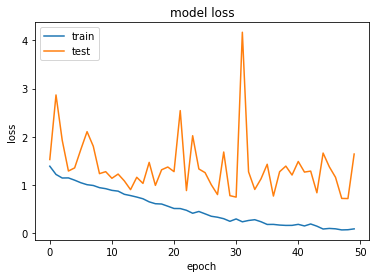

In [61]:

# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
# Saving the model.json

import json
model_json = model.to_json()
with open("C:\\Users\\mouni\\OneDrive\\Desktop\\audio\\New folder\\model1.json", "w") as json_file:
    json_file.write(model_json)

In [63]:
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
loaded_model = tf.keras.models.load_model("C:\\Users\\mouni\\OneDrive\\Desktop\\audio\\New folder\\data_noiseNshift1.h5",custom_objects={'GlorotUniform': glorot_uniform()})
print("Loaded Smodel from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded Smodel from disk
accuracy: 77.36%


## Predicting Stress on the test data

In [64]:
len(data2_df)

920

In [65]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]
    
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data2_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 920/920 [00:54<00:00, 17.01it/s]


In [66]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

58/58 [==============================] - 2s 31ms/step


In [67]:
preds


array([[          nan,           nan,           nan,           nan,
                  nan,           nan],
       [          nan,           nan,           nan,           nan,
                  nan,           nan],
       [          nan,           nan,           nan,           nan,
                  nan,           nan],
       ...,
       [2.7183455e-06, 1.8868883e-10, 3.9787453e-12, 9.9998736e-01,
        9.8678074e-06, 1.6547076e-12],
       [1.8419211e-08, 1.5005079e-15, 7.5249322e-17, 1.0000000e+00,
        2.2516481e-08, 1.0442622e-18],
       [3.6251282e-07, 2.5961278e-10, 2.3767815e-13, 9.9999321e-01,
        6.3816624e-06, 3.3302161e-13]], dtype=float32)

In [68]:
preds1=preds.argmax(axis=1)

In [69]:
preds1

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 1, 0, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 4, 4, 4,
       4, 4, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 3, 0, 5, 5, 5, 3, 5, 5, 5, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 0, 3, 3, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 5, 3, 5, 5, 5, 5,
       5, 5, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
abc = preds1.astype(int).flatten()

In [71]:
print(abc)

[0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 0 0 2 0 0 2 1 0 5 5 5 5 5 5 5 5 4 4 3 4 4 4 4 4 5 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 0 1 1 1 1 1 1 1 1 0 5 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 2 2 2 2 2 2 0 0 0 2 0 2 3 0 5 5 5 3
 5 5 5 5 4 4 4 4 4 4 4 4 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 0 3 3 0
 2 0 2 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 0 2 2 2 2 2 2 2 0 2 2 2 2 2 5 3 5 5 5 5 5 5 4 4 4 4 4 3 4 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 0 2 1 1 0 0 1 1 1 1 0 0 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 3 5 0 0 0 3 0 3 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 5 0 5 5 5
 5 5 5 4 5 3 3 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0
 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 0 2 2 2 2 0 0 2 0 0 0 0 0 5 5 5 5 5 5 5 5 4 4 0 0 4 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [72]:
predictions = (lb.inverse_transform((abc)))

In [73]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_Stressed
1,female_Stressed
2,female_Stressed
3,female_Stressed
4,female_Stressed
5,female_Stressed
6,female_Unstressed
7,female_Unstressed
8,female_Unstressed
9,female_Unstressed


In [74]:
actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [75]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_none
1,female_none
2,female_none
3,female_none
4,female_Unstressed
5,female_Unstressed
6,female_Unstressed
7,female_Unstressed
8,female_Unstressed
9,female_Unstressed


In [76]:
finaldf = actualdf.join(preddf)
#abc1234 = finaldf.astype(float).flatten()
#finalvalues = (lb.inverse_transform((abc1234)))

## Actual vs Predicted Values

In [77]:
finaldf[1:30]

,actualvalues,predictedvalues
1,female_none,female_Stressed
2,female_none,female_Stressed
3,female_none,female_Stressed
4,female_Unstressed,female_Stressed
5,female_Unstressed,female_Stressed
6,female_Unstressed,female_Unstressed
7,female_Unstressed,female_Unstressed
8,female_Unstressed,female_Unstressed
9,female_Unstressed,female_Unstressed
10,female_Unstressed,female_Unstressed


In [78]:
finaldf.groupby('actualvalues').count()


,predictedvalues
actualvalues,
female_Stressed,240
female_Unstressed,80
female_none,200
male_Stressed,240
male_Unstressed,80
male_neutral,80


In [79]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_Stressed,381
female_Unstressed,52
female_none,107
male_Stressed,242
male_Unstressed,61
male_neutral,77


In [80]:
finaldf.to_csv('C:\\Users\\mouni\\OneDrive\\Desktop\\audio\\New Folder\\Predictions1.csv', index=False)

In [81]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

80.21739130434783

In [83]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

81.5171958988117

In [84]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[230,   0,   1,   6,   0,   3],
       [ 28,  51,   0,   1,   0,   0],
       [ 92,   1, 106,   1,   0,   0],
       [ 21,   0,   0, 218,   0,   1],
       [  6,   0,   0,  12,  61,   1],
       [  4,   0,   0,   4,   0,  72]], dtype=int64)

In [85]:
# Visualize Confusion Matrix 

class_names = ['female_stressed', 'female_Unstressed', 'female_neutral', 'female_none']
#class_names1 = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad']
#class_names = ['male_negative', 'male_neutral', 'male_positive']
#class_names = ['male_negative', 'male_positive']
#class_names = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad', 'male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']


print(c, class_names)

[[230   0   1   6   0   3]
 [ 28  51   0   1   0   0]
 [ 92   1 106   1   0   0]
 [ 21   0   0 218   0   1]
 [  6   0   0  12  61   1]
 [  4   0   0   4   0  72]] ['female_stressed', 'female_Unstressed', 'female_neutral', 'female_none']


In [86]:
X, sample_rate = librosa.load("C:\\Users\\mouni\\OneDrive\\Desktop\\audio\\Audio_Speech_Actors_01-24\\Actor_02\\03-01-02-02-01-01-02.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
twodim= np.expand_dims(livedf2, axis=2)
livepreds = loaded_model.predict(twodim, batch_size=32, verbose=1)

livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
livepredictions = (lb.inverse_transform((liveabc)))
print(livepredictions)


1/1 [==============================] - 0s 357ms/step
['male_Stressed']
